In [20]:
!pip install librosa

In [105]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
#import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio


Name: librosa
Version: 0.10.0.post2
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: c:\users\mateu\anaconda3\envs\mmelab\lib\site-packages
Requires: audioread, decorator, joblib, lazy-loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing-extensions
Required-by: 


In [88]:
# Paths for data.
Ravdesssong = "C:/Users/mateu/Documents/DATASET for Kostek/Ravdess/Audio_Song_Actors_01-24/"
Ravdess = "C:/Users/mateu/Documents/DATASET for Kostek/Ravdess/audio_speech_actors_01-24/"
Crema = "C:/Users/mateu/Documents/DATASET for Kostek/cremad/AudioWAV/"
Tess = "C:/Users/mateu/Documents/DATASET for Kostek/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Mirex = "C:/Users/mateu/Documents/DATASET for Kostek/mirex/dataset/tu są wszystkie emocje/"

In [181]:
ravdesssong_directory_list = os.listdir(Ravdesssong)

file_emotionsong = []
filesong_path = []
for dir in ravdesssong_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdesssong + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        print(file)
        # third part in each file represents the emotion associated to that file.
        file_emotionsong.append(int(part[2]))
        filesong_path.append(Ravdesssong + dir + '/' + file)
        
# dataframe for emotion of files
emotionsong_df = pd.DataFrame(file_emotionsong, columns=['Emotions'])

# dataframe for path of files.
songpath_df = pd.DataFrame(filesong_path, columns=['Path'])
Ravdesssong_df = pd.concat([emotionsong_df, songpath_df], axis=1)

# changing integers to actual emotions.
Ravdesssong_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdesssong_df.head()


03-02-01-01-01-01-01.wav
03-02-01-01-01-02-01.wav
03-02-01-01-02-01-01.wav
03-02-01-01-02-02-01.wav
03-02-02-01-01-01-01.wav
03-02-02-01-01-02-01.wav
03-02-02-01-02-01-01.wav
03-02-02-01-02-02-01.wav
03-02-02-02-01-01-01.wav
03-02-02-02-01-02-01.wav
03-02-02-02-02-01-01.wav
03-02-02-02-02-02-01.wav
03-02-03-01-01-01-01.wav
03-02-03-01-01-02-01.wav
03-02-03-01-02-01-01.wav
03-02-03-01-02-02-01.wav
03-02-03-02-01-01-01.wav
03-02-03-02-01-02-01.wav
03-02-03-02-02-01-01.wav
03-02-03-02-02-02-01.wav
03-02-04-01-01-01-01.wav
03-02-04-01-01-02-01.wav
03-02-04-01-02-01-01.wav
03-02-04-01-02-02-01.wav
03-02-04-02-01-01-01.wav
03-02-04-02-01-02-01.wav
03-02-04-02-02-01-01.wav
03-02-04-02-02-02-01.wav
03-02-05-01-01-01-01.wav
03-02-05-01-01-02-01.wav
03-02-05-01-02-01-01.wav
03-02-05-01-02-02-01.wav
03-02-05-02-01-01-01.wav
03-02-05-02-01-02-01.wav
03-02-05-02-02-01-01.wav
03-02-05-02-02-02-01.wav
03-02-06-01-01-01-01.wav
03-02-06-01-01-02-01.wav
03-02-06-01-02-01-01.wav
03-02-06-01-02-02-01.wav


,Emotions,Path
0,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
1,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
2,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
3,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
4,calm,C:/Users/mateu/Documents/DATASET for Kostek/Ra...


In [182]:
mirex_directory_list = os.listdir(Mirex)

file_emotionsong = []
filesong_path = []

for  dir in mirex_directory_list:
    directories = os.listdir(Mirex + dir)

    for file in directories:
                
        file_emotionsong.append(dir)
        filesong_path.append(Mirex + dir + '/' + file)

#dataframe for emotion of files#
emotionsong_df = pd.DataFrame(file_emotionsong, columns=['Emotions'])

#dataframe for path of files.
pathsong_df = pd.DataFrame(filesong_path, columns=['Path'])
Mirex_df = pd.concat([emotionsong_df, pathsong_df], axis=1)
Mirex_df

,Emotions,Path
0,Agressive,C:/Users/mateu/Documents/DATASET for Kostek/mi...
1,Agressive,C:/Users/mateu/Documents/DATASET for Kostek/mi...
2,Agressive,C:/Users/mateu/Documents/DATASET for Kostek/mi...
3,Agressive,C:/Users/mateu/Documents/DATASET for Kostek/mi...
4,Agressive,C:/Users/mateu/Documents/DATASET for Kostek/mi...
...,...,...
898,Wry,C:/Users/mateu/Documents/DATASET for Kostek/mi...
899,Wry,C:/Users/mateu/Documents/DATASET for Kostek/mi...
900,Wry,C:/Users/mateu/Documents/DATASET for Kostek/mi...
901,Wry,C:/Users/mateu/Documents/DATASET for Kostek/mi...


In [183]:
datasong_path = pd.concat([Ravdesssong_df, Mirex_df], axis = 0)
datasong_path.to_csv("datasong_path.csv",index=False)
datasong_path.head()

,Emotions,Path
0,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
1,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
2,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
3,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
4,calm,C:/Users/mateu/Documents/DATASET for Kostek/Ra...


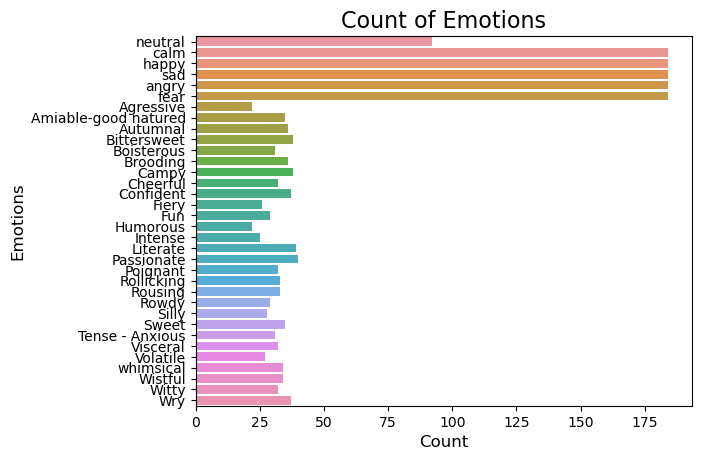

<Figure size 1200x400 with 0 Axes>

In [177]:
plt.title('Count of Emotions', size=16)
ax=sns.countplot(y=datasong_path["Emotions"])
plt.ylabel('Emotions', size=12)
plt.xlabel('Count', size=12)
plt.figure(figsize=(12,4))
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
plt.close()

In [93]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()


,Emotions,Path
0,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
1,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
2,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
3,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
4,calm,C:/Users/mateu/Documents/DATASET for Kostek/Ra...


In [94]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,C:/Users/mateu/Documents/DATASET for Kostek/cr...
1,disgust,C:/Users/mateu/Documents/DATASET for Kostek/cr...
2,fear,C:/Users/mateu/Documents/DATASET for Kostek/cr...
3,happy,C:/Users/mateu/Documents/DATASET for Kostek/cr...
4,neutral,C:/Users/mateu/Documents/DATASET for Kostek/cr...


In [95]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

['OAF_back_angry.wav', 'OAF_bar_angry.wav', 'OAF_base_angry.wav', 'OAF_bath_angry.wav', 'OAF_bean_angry.wav', 'OAF_beg_angry.wav', 'OAF_bite_angry.wav', 'OAF_boat_angry.wav', 'OAF_bone_angry.wav', 'OAF_book_angry.wav', 'OAF_bought_angry.wav', 'OAF_burn_angry.wav', 'OAF_cab_angry.wav', 'OAF_calm_angry.wav', 'OAF_came_angry.wav', 'OAF_cause_angry.wav', 'OAF_chain_angry.wav', 'OAF_chair_angry.wav', 'OAF_chalk_angry.wav', 'OAF_chat_angry.wav', 'OAF_check_angry.wav', 'OAF_cheek_angry.wav', 'OAF_chief_angry.wav', 'OAF_choice_angry.wav', 'OAF_cool_angry.wav', 'OAF_dab_angry.wav', 'OAF_date_angry.wav', 'OAF_dead_angry.wav', 'OAF_death_angry.wav', 'OAF_deep_angry.wav', 'OAF_dime_angry.wav', 'OAF_dip_angry.wav', 'OAF_ditch_angry.wav', 'OAF_dodge_angry.wav', 'OAF_dog_angry.wav', 'OAF_doll_angry.wav', 'OAF_door_angry.wav', 'OAF_fail_angry.wav', 'OAF_fall_angry.wav', 'OAF_far_angry.wav', 'OAF_fat_angry.wav', 'OAF_fit_angry.wav', 'OAF_five_angry.wav', 'OAF_food_angry.wav', 'OAF_gap_angry.wav', 'OAF_

,Emotions,Path
0,angry,C:/Users/mateu/Documents/DATASET for Kostek/TE...
1,angry,C:/Users/mateu/Documents/DATASET for Kostek/TE...
2,angry,C:/Users/mateu/Documents/DATASET for Kostek/TE...
3,angry,C:/Users/mateu/Documents/DATASET for Kostek/TE...
4,angry,C:/Users/mateu/Documents/DATASET for Kostek/TE...


In [96]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
1,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
2,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
3,neutral,C:/Users/mateu/Documents/DATASET for Kostek/Ra...
4,calm,C:/Users/mateu/Documents/DATASET for Kostek/Ra...


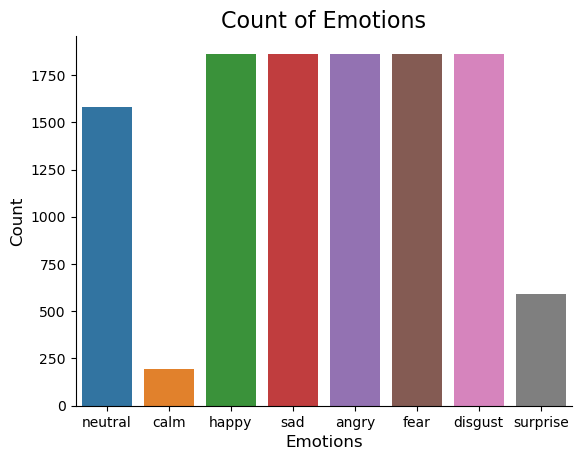

In [97]:
plt.title('Count of Emotions', size=16)
sns.countplot(x=data_path["Emotions"])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
plt.close()

In [98]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

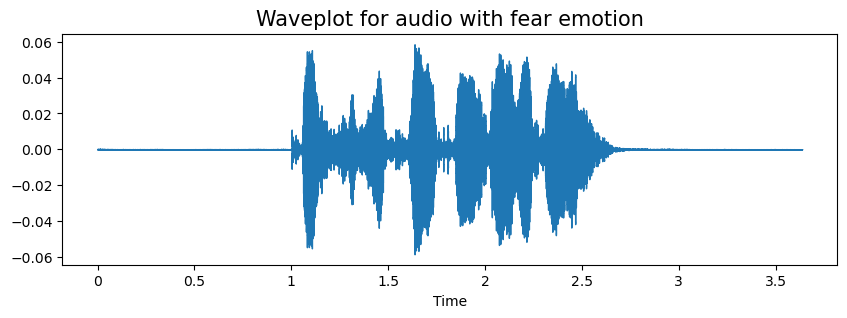

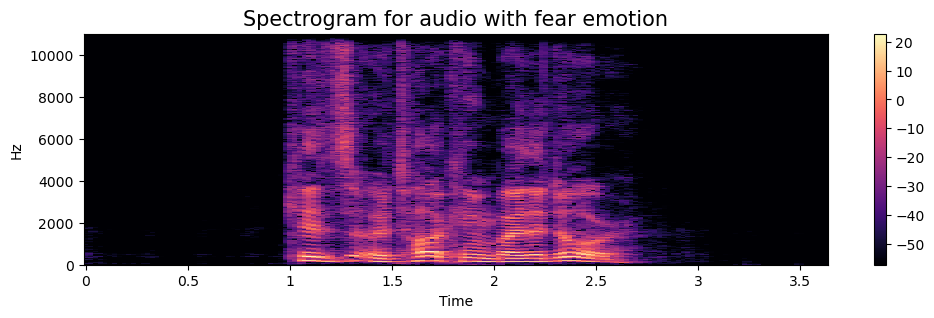

In [99]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [159]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data,ratio):
    return librosa.effects.time_stretch(data, rate=ratio)

def shift(data):
    shift_range = int(np.random.uniform(low=-10, high = 10)*1000)
    return np.roll(data, shift_range)

def pitch( data, sampling_rate, steps):
    return librosa.effects.pitch_shift(data,sr = sampling_rate, n_steps=steps)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)
sample_rate

22050

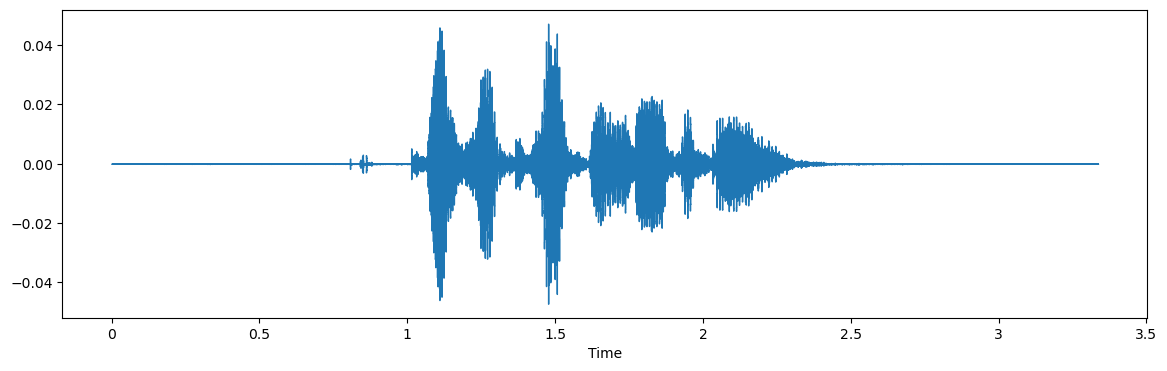

In [154]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

[-2.6555711e-06 -1.2237584e-05 -9.1077754e-07 ... -1.0303405e-09
  1.6803573e-09 -2.1517024e-09]


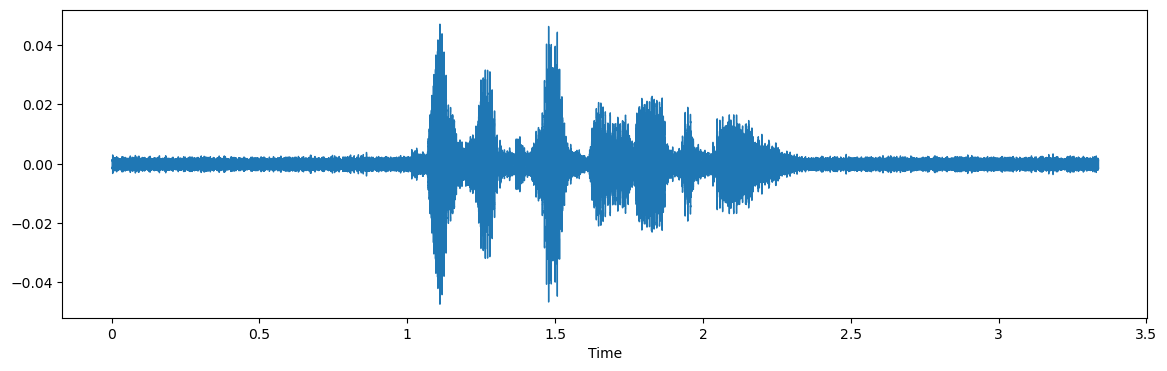

In [155]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)
print(data)

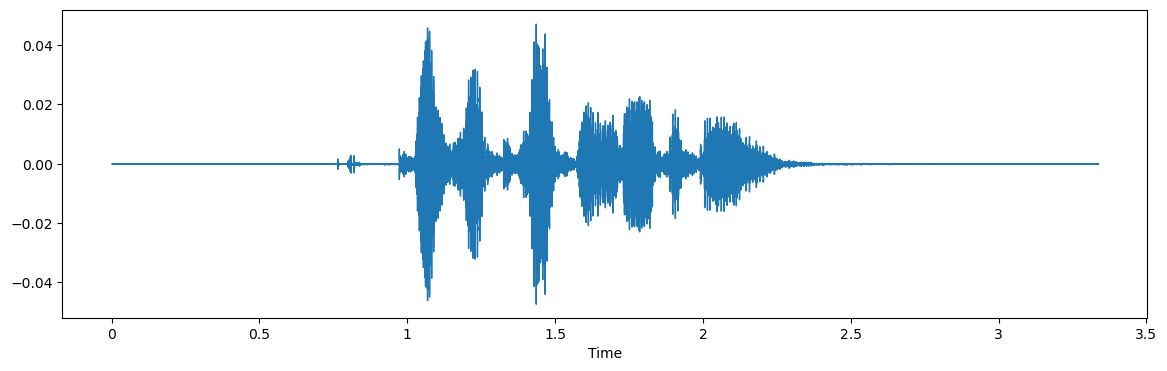

In [160]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

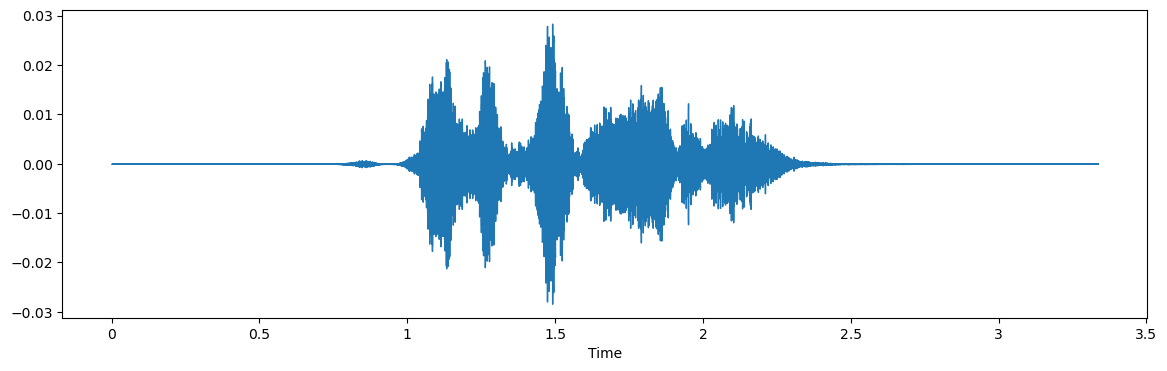

In [157]:
x = pitch(data, sample_rate, 4)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

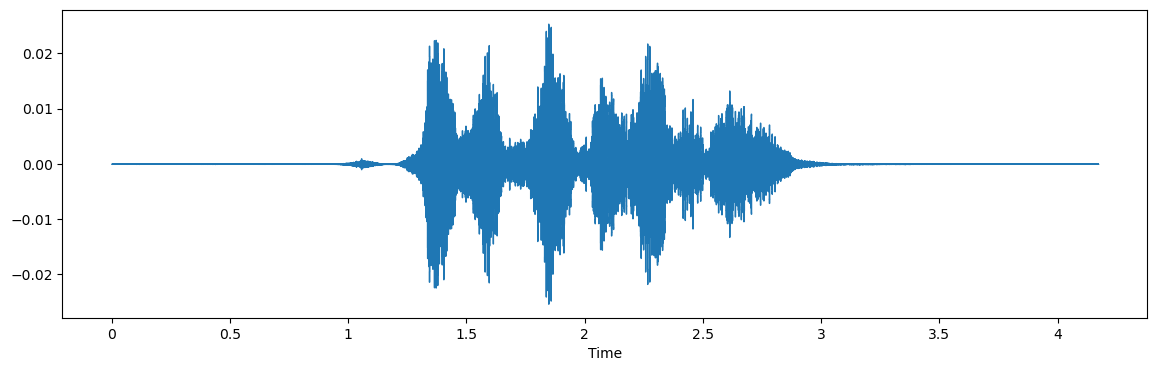

In [158]:
x = stretch(data ,0.8)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)